# Credit Card Fraud Detection

data sheet collection : Datasets :- https://www.kaggle.com/
objective :- Credit Card Fraud Detection

Business Objective:
The primary business objective of credit card fraud detection is to minimize financial losses caused by fraudulent transactions. The goal is to protect customers and financial institutions from unauthorized transactions and fraudulent activities. By accurately identifying and preventing fraudulent transactions, the business aims to maintain the trust of its customers, reduce financial liabilities, and ensure the security of credit card transactions.

Content:
The content of the credit card fraud detection system includes historical credit card transaction data, which contains features such as transaction amount, date and time, location, merchant information, customer information, and any other relevant transaction-related attributes. This data serves as the input for the machine learning model used for fraud detection.

ML Success Criteria:
The success criteria for the machine learning model used in credit card fraud detection include high accuracy, precision, recall, and F1-score. The model should accurately identify fraudulent transactions while minimizing false positives and false negatives. Achieving high model performance is essential to ensure that the majority of fraudulent transactions are detected and flagged for further investigation, while minimizing the number of legitimate transactions mistakenly identified as fraud.

Economic Success Criteria:
The economic success criteria for credit card fraud detection are related to financial impact and cost-effectiveness. Key metrics include:

Reduction in Fraud Losses: The model should contribute to a significant reduction in financial losses due to credit card fraud. This reduction will directly impact the bottom line of the financial institution by preventing financial losses from fraudulent transactions.

Cost of False Positives: While high precision is essential to minimize false positives, too many false positives can inconvenience legitimate customers. The economic success criteria include optimizing the model to reduce the number of false positives and associated costs, such as customer support and potential lost revenue.

Operational Efficiency: The model should be computationally efficient and capable of handling real-time credit card transactions at scale. A cost-effective model that performs well even under high transaction volumes is crucial for the business's operational efficiency.

Customer Trust and Retention: Maintaining customer trust is essential in the financial industry. Successful fraud detection that minimizes disruptions to legitimate transactions can lead to higher customer satisfaction, increased trust, and improved customer retention.

Return on Investment (ROI): The cost of implementing and maintaining the fraud detection system should be justified by the reduction in fraud losses and the overall improvement in business operations. A positive ROI is a critical economic success criterion for the business.

In [1]:
# import all the require library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the drive
import google_drive_downloader
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import the data from the drive
data = pd.read_csv("/content/drive/MyDrive/CodeClause Internship /creditcard.csv")

#Explore the Data:
Explore the data to understand its structure, the available columns, data types, missing values, etc.

In [4]:
data.head()          # Display the first few rows of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()    # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()   # Get summary statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(data.isnull().sum())  # Check for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:

 # 0 indicate no fruad & 1 indicate fruad

In [10]:
# Assuming 'data' is your DataFrame containing the 'Class' column
class_counts = data['Class'].value_counts()
total_samples = len(data)

class_percentages = (class_counts / total_samples) * 100
print(class_percentages)

0    99.827251
1     0.172749
Name: Class, dtype: float64


#data visulisation

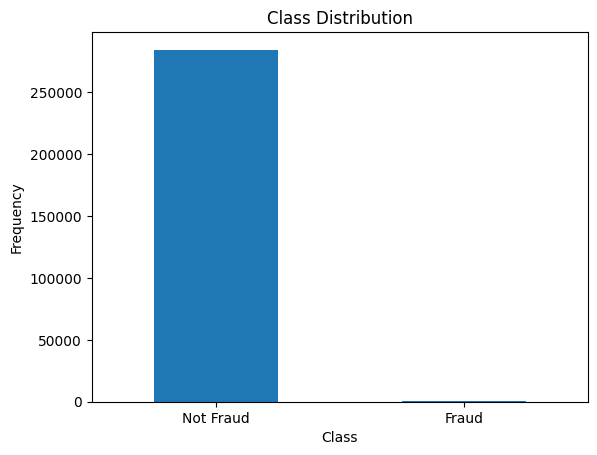

In [11]:
count_classes = data['Class'].value_counts()
count_classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2),['Not Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

<Axes: ylabel='Class'>

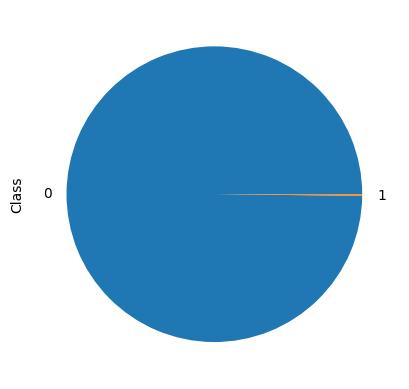

In [12]:
class_percentages.plot.pie()

In [13]:
fraud = data[data['Class'] == 1]
not_fraud =data[data['Class'] == 0]

In [14]:
# correlation between the data
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

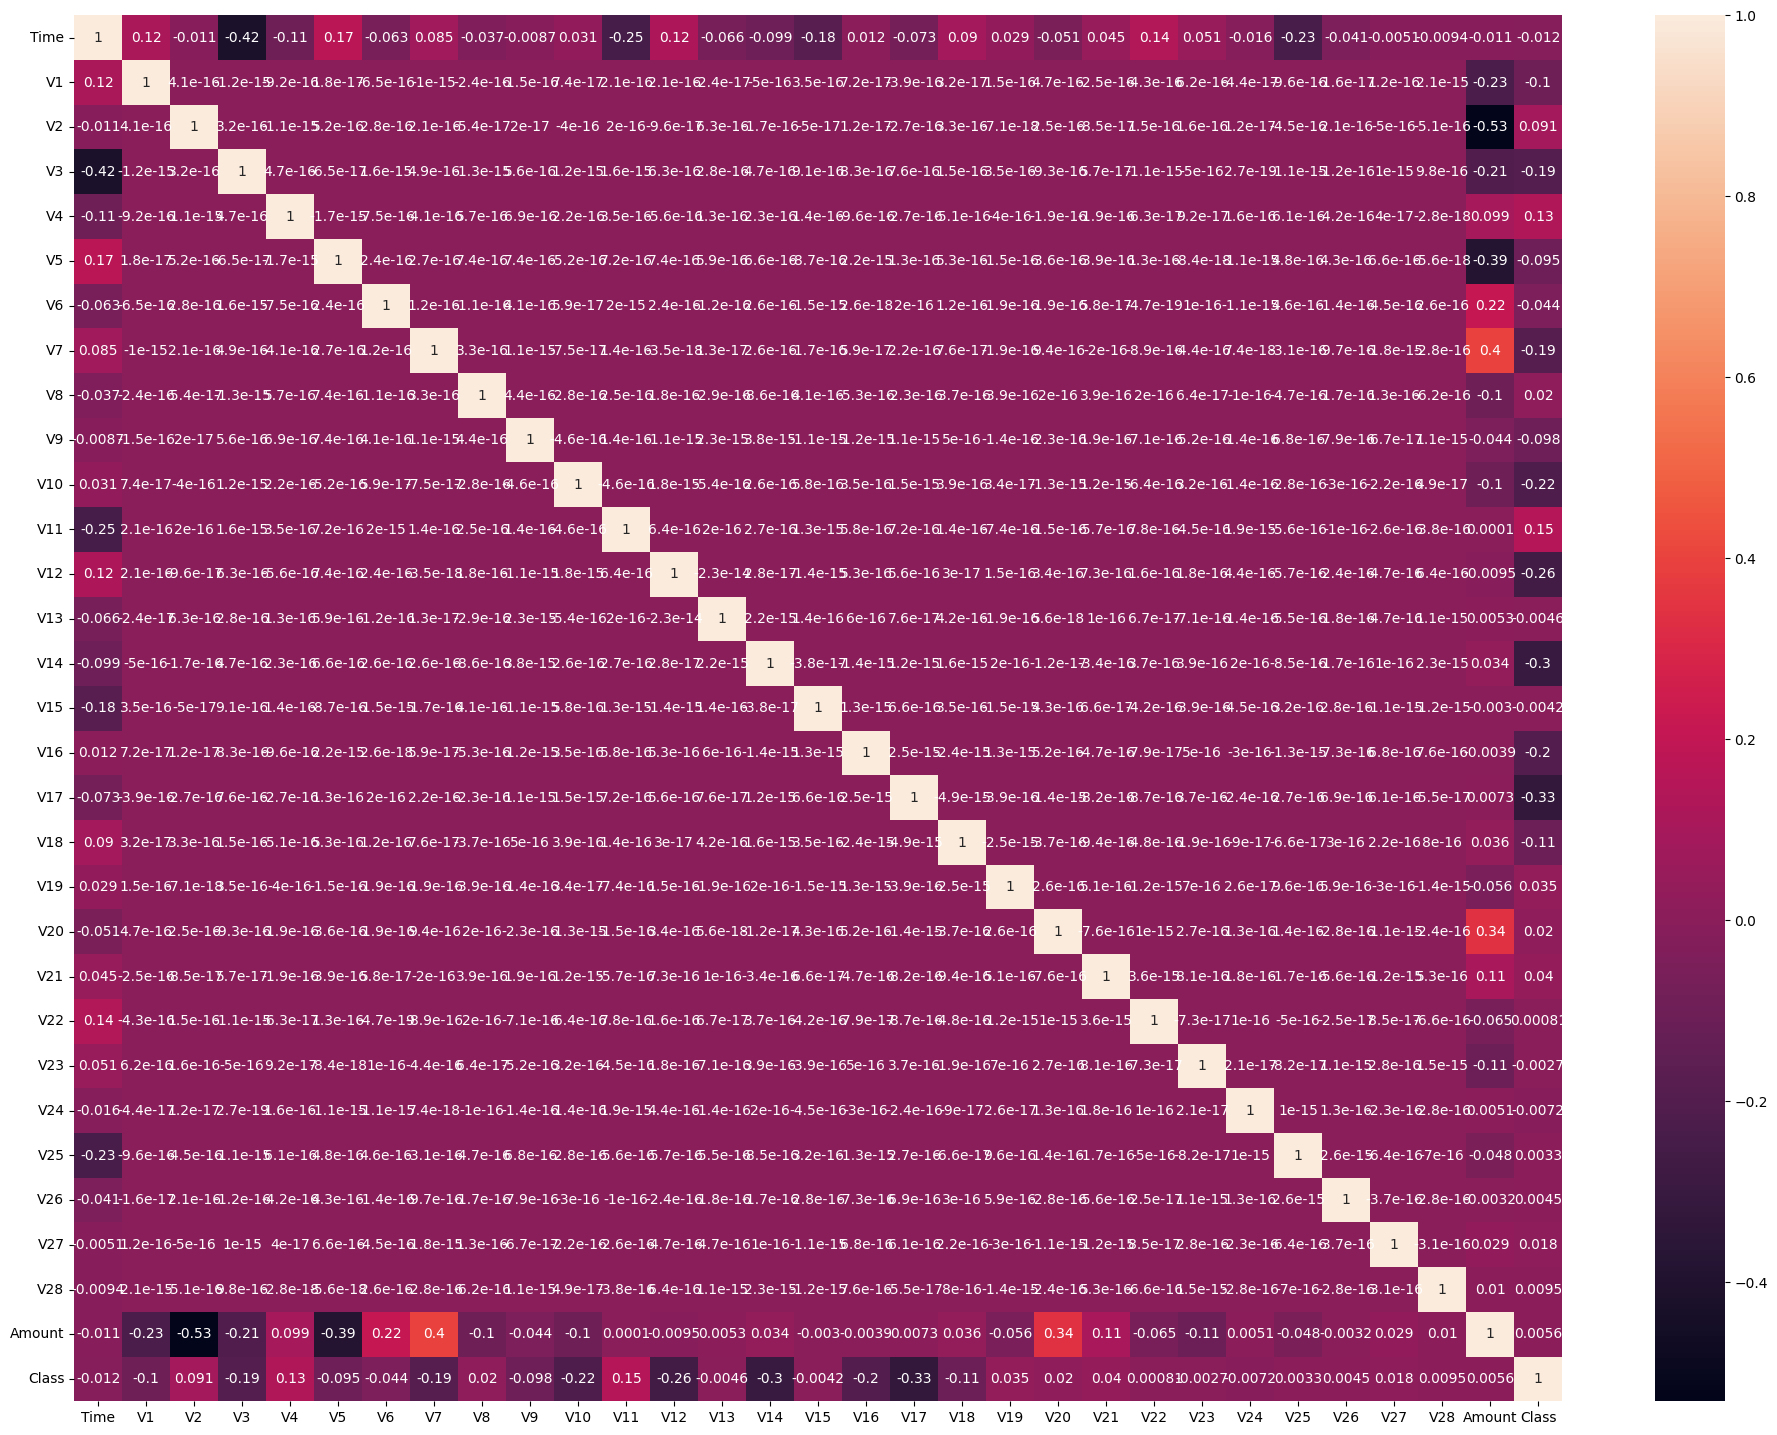

In [15]:
# correlation heatmap
import seaborn as sns
plt.figure(figsize=(24,18))
sns.heatmap(corr , annot=True)

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

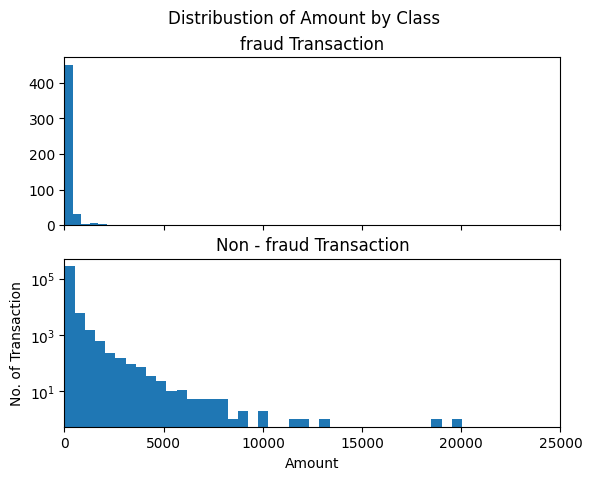

In [18]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Distribustion of Amount by Class")

ax1.hist(fraud.Amount, bins = 5)
ax1.set_title("fraud Transaction")

ax2.hist(not_fraud.Amount, bins = 50)
ax2.set_title("Non - fraud Transaction")

plt.xlabel("Amount")
plt.ylabel("No. of Transaction")

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

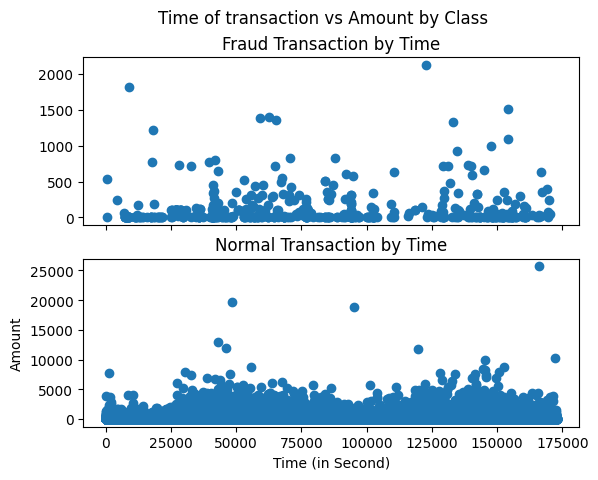

In [19]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud Transaction by Time')

ax2.scatter(not_fraud.Time, not_fraud.Amount)
ax2.set_title('Normal Transaction by Time')

plt.xlabel("Time (in Second)")
plt.ylabel("Amount")

plt.show()

#split the data in train and test

In [20]:
y = data['Class']
x = data.drop(['Class'], axis = 1)

In [21]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [23]:
#split the data in x_train,x_test,y_train,y_test
import sklearn
# Now you can use scikit-learn modules and functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 100 , test_size =0.20)

In [24]:
#checking the spread of da
print(np.sum(y))
print(np.sum(y_test))
print(np.sum(y_train))

492
96
396


In [25]:
#plot the distance of variance
cols = list(x.columns.values)

# Model building

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
# Evaluate the model
print("Training Set Evaluation:")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

print("\nTest Set Evaluation:")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))

Training Set Evaluation:
[[227362     87]
 [    88    308]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.78      0.78      0.78       396

    accuracy                           1.00    227845
   macro avg       0.89      0.89      0.89    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy: 0.9992319339902126

Test Set Evaluation:
[[56833    33]
 [   29    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.67      0.70      0.68        96

    accuracy                           1.00     56962
   macro avg       0.83      0.85      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9989115550718023


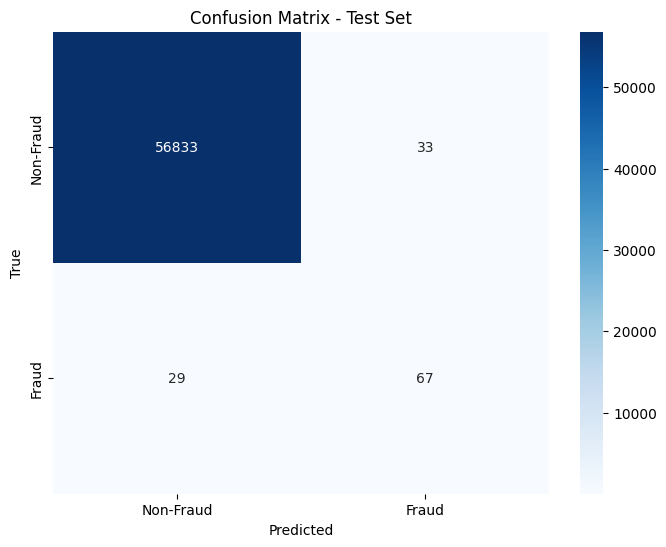

In [30]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [31]:
# Ensemble Learning - Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl.fit(x_train, y_train)
y_pred_train_bg = bgcl.predict(x_train)
y_pred_test_bg = bgcl.predict(x_test)
print(classification_report(y_train, y_pred_train_bg))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      0.99      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)
print(classification_report(y_train, y_pred_train_dt))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [33]:
# Ensemble Learning - AdaBoosting method
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state=1)
adbcl.fit(x_train, y_train)
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.86      0.77      0.81       396

    accuracy                           1.00    227845
   macro avg       0.93      0.88      0.90    227845
weighted avg       1.00      1.00      1.00    227845

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.69      0.70        96

    accuracy                           1.00     56962
   macro avg       0.85      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.84      0.82      0.83       396

    accuracy                           1.00    227845
   macro avg       0.92      0.91      0.92    227845
weighted avg       1.00      1.00      1.00    227845

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.71      0.70        96

    accuracy                           1.00     56962
   macro avg       0.84      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:
# XGBoost
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
# IsolationForest, LocalOutlierFactor, OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),

                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),

                 "One Class SVM" : OneClassSVM()}

NameError: ignored